In [33]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


# Import API key
from api_keys import geoapify_key

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
ideal_cities_df = pd.read_csv("output_data/ideal_cities_all_info.csv")

# Display sample data
ideal_cities_df.head(15)

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,...,Safety Index,Number of Hotels,Number of Resturants,Bodies of Water,Tourist Attractions,Natural Places,Hospital,Entertainment,Rental Car,Airport
0,3633,goya,-29.1400,-59.2626,28.96,31,0,4.87,AR,2023-04-28 11:01:27,...,NaN,2,0,5,3,8,4,2,0,3
1,3010,patterson,37.4716,-121.1297,28.34,41,0,1.46,US,2023-04-28 10:57:41,...,NaN,3,2,61,5,61,0,3,0,1
2,3510,dar kulayb,26.0686,50.5039,28.09,52,0,4.20,BH,2023-04-28 11:00:32,...,NaN,4,40,17,19,160,4,3,0,1
3,2886,itaqui,-29.1253,-56.5531,28.29,27,0,4.83,BR,2023-04-28 10:57:09,...,NaN,7,6,13,4,32,5,1,0,1
4,2293,tacuarembo,-31.7333,-55.9833,28.39,28,0,3.59,UY,2023-04-28 10:54:08,...,NaN,8,4,12,9,41,1,2,1,1
5,2730,indian harbour beach,28.1489,-80.5884,28.03,63,0,7.20,US,2023-04-28 10:56:27,...,NaN,8,48,200,9,200,4,9,4,1
6,1163,ceres,37.5949,-120.9577,28.91,38,0,1.54,US,2023-04-28 10:48:46,...,NaN,16,12,61,1,101,4,5,0,1
7,4129,paso de los libres,-29.7131,-57.0899,28.02,44,0,3.60,AR,2023-04-28 11:04:18,...,NaN,21,9,13,9,22,6,5,0,2
8,660,ngaoundere,7.3167,13.5833,28.94,51,0,1.54,CM,2023-04-28 10:44:10,...,NaN,45,149,6,4,46,4,1,1,1
9,4181,zayed city,24.3768,54.5890,28.89,57,0,1.03,AE,2023-04-28 11:04:38,...,NaN,68,200,20,31,104,22,4,35,1


# Map of all Cities 

In [7]:
%%capture --no-display

map_plot_3 = ideal_cities_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Humidity",
    color = "City"
)

# Display the map plot
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Humidity)

# Number of Hotels Per City 

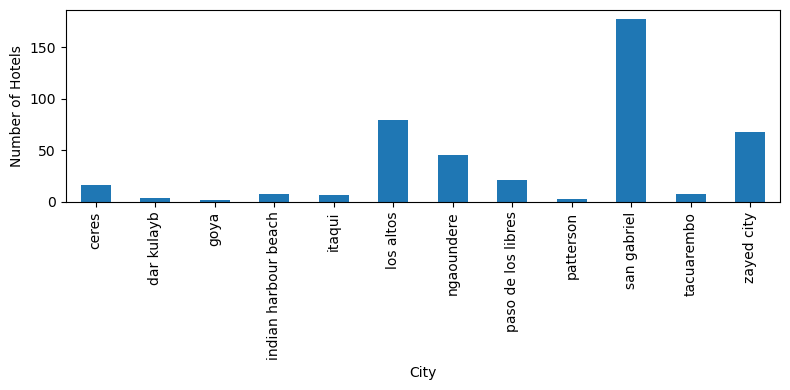

In [26]:
ideal_cities_hotels = ideal_cities_df.groupby("City")["Number of Hotels"].sum()

plt.figure(figsize=(8,4))
ideal_cities_hotels.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Hotels')
plt.tight_layout()
plt.show()


# Number of Hotels vs Restaurants

In [34]:
#Linear Regression Function 

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    fig, ax = plt.subplots()
    ax.scatter(x_values, y_values)
    ax.plot(x_values, regress_values, "r-")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\n"
    ax.text(*text_coordinates, line_eq, fontsize=12, color="red")
    
    r_value_text = f"The r-value is: {rvalue}"
  

    print(r_value_text)
    plt.show()

The r-value is: 0.8272222601183399


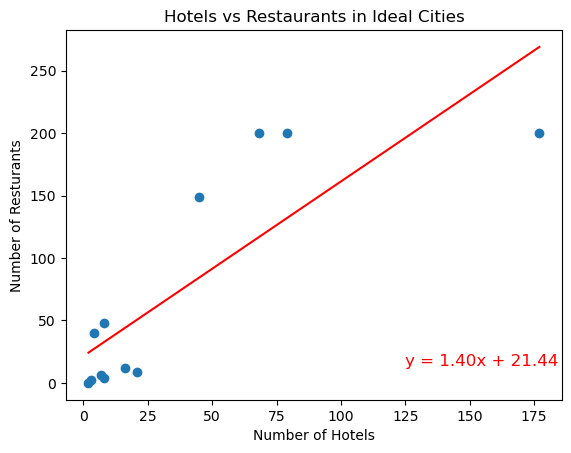

In [36]:
#Linear Regression Restaurants vs Hotels 

x_values = ideal_cities_df['Number of Hotels']
y_values =ideal_cities_df['Number of Resturants']

plot_linear_regression(x_values, y_values, 
                        'Hotels vs Restaurants in Ideal Cities',
                        'Number of Hotels', 'Number of Resturants',
                       (125,0))


# Number of Hotels vs. Bodies of water

The r-value is: 0.07125467077126038


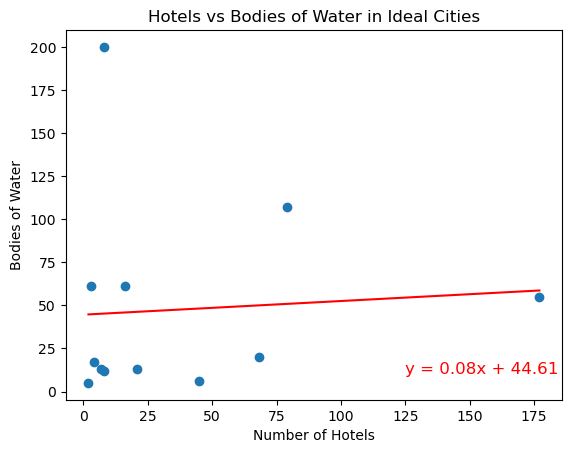

In [37]:
x_values = ideal_cities_df['Number of Hotels']
y_values =ideal_cities_df['Bodies of Water']

plot_linear_regression(x_values, y_values, 
                        'Hotels vs Bodies of Water in Ideal Cities',
                        'Number of Hotels', 'Bodies of Water',
                       (125,0))

# Number of Hotels vs Humidity

The r-value is: 0.6182841394462346


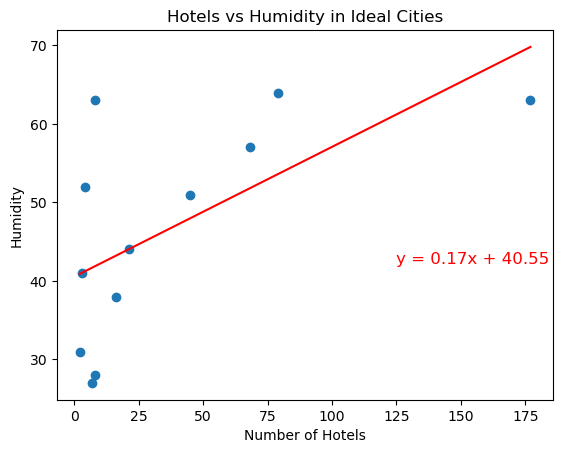

In [42]:
x_values = ideal_cities_df['Number of Hotels']
y_values =ideal_cities_df['Humidity']

plot_linear_regression(x_values, y_values, 
                        'Hotels vs Humidity in Ideal Cities',
                        'Number of Hotels', 'Humidity',
                       (125,40))

# Number of Hotels vs Wind Speed

The r-value is: -0.3861063876312678


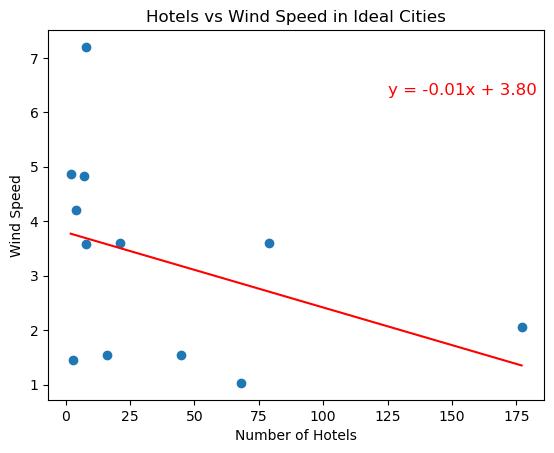

In [40]:
x_values = ideal_cities_df['Number of Hotels']
y_values =ideal_cities_df['Wind Speed']

plot_linear_regression(x_values, y_values, 
                        'Hotels vs Wind Speed in Ideal Cities',
                        'Number of Hotels', 'Wind Speed',
                       (125,6))